Syed Khurram Abbas Rizvi:CS-19130
Arham Ahmed Siddiqui:CS-19129
Huzaifa Yousuf:CS-19150

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=42d2a0e8d38c41370ca1df7853f084ab2f9dae7a1329804d8fe70d178a699269
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('The_Grades_Dataset.csv') #reading the dataset

In [ ]:
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


**Preprocessing**

In [ ]:
for column in data:                             # Replacing the grades with GPs
    data[column]=data[column].replace('A+',4.0)
    data[column]=data[column].replace('A',4.0)
    data[column]=data[column].replace('A-',3.7)
    data[column]=data[column].replace('B+',3.3)
    data[column]=data[column].replace('B',3.0)
    data[column]=data[column].replace('B-',2.7)
    data[column]=data[column].replace('C+',2.3)
    data[column]=data[column].replace('C',2.0)
    data[column]=data[column].replace('C-',1.7)
    data[column]=data[column].replace('D+',1.3)
    data[column]=data[column].replace('D',1.0)
    data[column]=data[column].replace('D-',0.7)
    data[column]=data[column].replace('WU',0)
    data[column]=data[column].replace('W',0)
    data[column]=data[column].replace('F',0)
    data[column]=data[column].replace('I',0)

In [ ]:
data #data containing GPs instead of Grades

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,CS-97569,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,CS-97570,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [ ]:
data.to_csv('newgpadata.csv',index=False) #moving updated dataset to new csv for performing data preprocessing

In [ ]:
data=pd.read_csv('newgpadata.csv')
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,CS-97569,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,CS-97570,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [ ]:
data.columns[data.isna().any()] #Checking which columns containing NA data.


Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [ ]:
data.fillna(data.mean().round(1), inplace=True) #Fill NA/NaN values using the inplace method.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
data.columns[data.isna().any()] #Checking which columns containing NA data.


Index([], dtype='object')

In [ ]:
x = data.drop(["CGPA","Seat No."], axis="columns") # Train model
y = data['CGPA']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=0)
print(x_train,y_train)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
268     4.0     3.7     3.3        3.7     3.7     3.7     3.3     3.7   
239     4.0     3.3     4.0        4.0     3.7     4.0     3.7     4.0   
521     1.7     1.3     2.7        2.0     2.7     2.0     3.0     1.7   
330     1.0     2.3     3.3        1.3     2.7     1.7     4.0     3.7   
140     4.0     2.7     3.3        3.0     3.7     3.7     4.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
277     3.3     1.3     1.3        3.0     1.3     4.0     3.7     3.0   
9       4.0     3.0     2.3        3.0     3.0     3.7     2.0     2.7   
359     3.7     3.7     4.0        3.3     4.0     4.0     3.3     4.0   
192     4.0     4.0     4.0        4.0     4.0     4.0     4.0     3.7   
559     3.7     2.3     4.0        3.0     3.0     3.7     2.3     1.0   

     EE-119  ME-107  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  \
268     3.7     2.0  ...     3.7   

In [ ]:
# Preprocessing for model_1
x1 = data.drop(["CGPA","Seat No.","HS-205/20","MT-222","EE-222","MT-224","CS-210","CS-211","CS-203","CS-214","EE-217","CS-212","CS-215","MT-331","EF-303","HS-304","CS-301","CS-302","TC-383","MT-442","EL-332","CS-318","CS-306","CS-312","CS-317","CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412","CS-423","CS-412"], axis="columns")
y1 = data['CGPA']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1,test_size=0.2,random_state=0)
print(x1_train,y1_train)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
268     4.0     3.7     3.3        3.7     3.7     3.7     3.3     3.7   
239     4.0     3.3     4.0        4.0     3.7     4.0     3.7     4.0   
521     1.7     1.3     2.7        2.0     2.7     2.0     3.0     1.7   
330     1.0     2.3     3.3        1.3     2.7     1.7     4.0     3.7   
140     4.0     2.7     3.3        3.0     3.7     3.7     4.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
277     3.3     1.3     1.3        3.0     1.3     4.0     3.7     3.0   
9       4.0     3.0     2.3        3.0     3.0     3.7     2.0     2.7   
359     3.7     3.7     4.0        3.3     4.0     4.0     3.3     4.0   
192     4.0     4.0     4.0        4.0     4.0     4.0     4.0     3.7   
559     3.7     2.3     4.0        3.0     3.0     3.7     2.3     1.0   

     EE-119  ME-107  CS-107  
268     3.7     2.0     4.0  
239     3.7     4.0     4.0  
521     3.3     2.3  

In [ ]:
# Preprocessing for model_2
x2 = data.drop(["CGPA","Seat No.","MT-331","EF-303","HS-304","CS-301","CS-302","TC-383","MT-442","EL-332","CS-318","CS-306","CS-312","CS-317","CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412","CS-423","CS-412"], axis="columns")
y2 = data['CGPA']

In [ ]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2, y2,test_size=0.2,random_state=0)
print(x2_train,y2_train)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
268     4.0     3.7     3.3        3.7     3.7     3.7     3.3     3.7   
239     4.0     3.3     4.0        4.0     3.7     4.0     3.7     4.0   
521     1.7     1.3     2.7        2.0     2.7     2.0     3.0     1.7   
330     1.0     2.3     3.3        1.3     2.7     1.7     4.0     3.7   
140     4.0     2.7     3.3        3.0     3.7     3.7     4.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
277     3.3     1.3     1.3        3.0     1.3     4.0     3.7     3.0   
9       4.0     3.0     2.3        3.0     3.0     3.7     2.0     2.7   
359     3.7     3.7     4.0        3.3     4.0     4.0     3.3     4.0   
192     4.0     4.0     4.0        4.0     4.0     4.0     4.0     3.7   
559     3.7     2.3     4.0        3.0     3.0     3.7     2.3     1.0   

     EE-119  ME-107  ...  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  \
268     3.7     2.0  ...     3.7   

In [ ]:
# Preprocessing for model_3
x3 = data.drop(["CGPA","Seat No.","MT-442","CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412","CS-423","CS-412"], axis="columns")
y3 = data['CGPA']

In [ ]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3, y3,test_size=0.2,random_state=0)
print(x3_train,y3_train)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
268     4.0     3.7     3.3        3.7     3.7     3.7     3.3     3.7   
239     4.0     3.3     4.0        4.0     3.7     4.0     3.7     4.0   
521     1.7     1.3     2.7        2.0     2.7     2.0     3.0     1.7   
330     1.0     2.3     3.3        1.3     2.7     1.7     4.0     3.7   
140     4.0     2.7     3.3        3.0     3.7     3.7     4.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
277     3.3     1.3     1.3        3.0     1.3     4.0     3.7     3.0   
9       4.0     3.0     2.3        3.0     3.0     3.7     2.0     2.7   
359     3.7     3.7     4.0        3.3     4.0     4.0     3.3     4.0   
192     4.0     4.0     4.0        4.0     4.0     4.0     4.0     3.7   
559     3.7     2.3     4.0        3.0     3.0     3.7     2.3     1.0   

     EE-119  ME-107  ...  EF-303  HS-304  CS-301  CS-302  TC-383  EL-332  \
268     3.7     2.0  ...     3.7   

**Support Vector Regressor for Model 1**

In [86]:
from sklearn.svm import SVR # Load libraries
regressor1=SVR(kernel='linear') # Create decision tree classifier object
regressor1.fit(x1_train.values,y1_train.values)

SVR(kernel='linear')

In [87]:
y_pred_1=regressor1.predict(x1_test.values) #predicting outputs using svr

In [88]:
print(y_pred_1)

[2.93947788 2.54608118 3.17568862 3.01643979 3.05598215 2.15361471
 2.66661151 3.6064424  3.30906286 1.5920766  3.2357229  2.87223974
 2.04231269 3.56676098 3.87648607 3.27164601 3.6793654  3.61207528
 3.29248752 3.14198724 2.55755126 2.96609817 3.08266268 3.82135943
 3.45537424 3.24444198 3.41857321 3.29274715 2.67890168 3.46700974
 1.956088   3.3310548  2.66636018 2.68847    2.2630831  2.72195809
 3.66921281 2.43315027 2.97561879 3.63666465 2.89030382 3.46005911
 3.50511935 3.27837983 3.65340987 3.09583406 2.76802802 2.05203642
 2.70349577 3.50204859 2.62821969 2.51586522 3.76840042 1.95251055
 2.43077951 2.8645017  2.89916921 2.81880837 3.12630148 2.70199947
 3.14782912 2.56052988 2.10492804 2.4844843  3.18324038 2.48634091
 3.64235006 2.71646503 3.46687011 2.43266116 3.55782498 2.6174403
 2.44995704 2.28468389 2.03371513 3.81509688 1.84410956 2.53610785
 3.37828835 2.68756529 2.11141108 3.83067289 2.90034988 3.0032954
 3.20473896 3.14345543 2.80199406 3.54849796 2.6893679  2.823944

In [89]:
mae = metrics.mean_absolute_error(y1_test.values,y_pred_1)
mse = metrics.mean_squared_error(y1_test.values,y_pred_1)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y1_test.values,y_pred_1)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.19035505983272513
MSE: 0.05806139605244919
RMSE: 0.24095932447707682
R-Squared: 0.8335082004984331


In [ ]:
new_input=[[3.7,3.7,3.7,3.7,3.7,2.0,4.0,2.7,4.0,2.0,2.0]]
out=regressor1.predict(new_input)
print(out)

[3.23302039]


**Linear Regression for Model 1**

In [90]:
from sklearn.linear_model import LinearRegression #Loading libraries
regressor2=LinearRegression() #Creating an object of Linear Regression
regressor2.fit(x1_train.values,y1_train.values)

LinearRegression()

In [91]:
y_pred_2=regressor2.predict(x1_test.values)

In [92]:
mae = metrics.mean_absolute_error(y1_test.values,y_pred_2)
mse = metrics.mean_squared_error(y1_test.values,y_pred_2)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y1_test.values,y_pred_2)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.19481193440340305
MSE: 0.05920628978251614
RMSE: 0.24332342629207762
R-Squared: 0.8302252030110024


In [ ]:
new_input=[[3.7,3.7,3.7,3.7,3.7,2.0,4.0,2.7,4.0,2.0,2.0]]
out=regressor2.predict(new_input)
print(out)

[3.2280251]


**KNN Regressor for Model 1**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn
x, y = mglearn.datasets.make_wave(n_samples=1400)
# split the wave dataset into a training and a test set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,
random_state=0)
# instantiate the model and set the number of neighbors to consider to 15
reg = KNeighborsRegressor(n_neighbors=15)
# fit the model using the training data and training targets
reg.fit(x1_train.values, y1_train.values)
a=reg.predict(x1_test.values)
print("Test set predictions:\n{}".format(a))

Test set predictions:
[3.18826667 2.68413333 3.0946     3.00246667 3.143      2.38166667
 2.88546667 3.50166667 3.38093333 1.94653333 3.3512     2.8752
 2.2376     3.6822     3.84866667 3.3112     3.75433333 3.60513333
 3.29053333 3.28926667 2.7348     3.12593333 2.94606667 3.8688
 3.48493333 3.44533333 3.38566667 3.3852     2.86826667 3.35326667
 2.13433333 3.39606667 2.72593333 2.79813333 2.35566667 2.67973333
 3.7908     2.5372     2.91186667 3.6598     2.91626667 3.3946
 3.50226667 3.4072     3.6372     3.154      2.93093333 1.87266667
 2.60986667 3.35973333 2.54786667 2.7026     3.78233333 2.19153333
 2.58846667 2.87646667 3.0652     2.93766667 3.19766667 2.78906667
 3.32026667 2.5462     2.1376     2.6578     3.25066667 2.5882
 3.72453333 2.80306667 3.5302     2.47686667 3.63086667 2.88486667
 2.4822     2.041      2.05213333 3.84406667 2.1456     2.52253333
 3.5276     2.80106667 2.09866667 3.8572     2.9638     2.98566667
 3.29686667 3.26766667 2.8238     3.60353333 2.76606667 

In [ ]:
mae = metrics.mean_absolute_error(y1_test.values, a)
mse = metrics.mean_squared_error(y1_test.values, a)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y1_test.values, a)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results:
MAE: 0.19460979020979022
MSE: 0.06080678588966589
RMSE: 0.24659031994315164
R-Squared: 0.825635759850974


In [ ]:
new_input=[[3.7,3.7,3.7,3.7,3.7,2.0,4.0,2.7,4.0,2.0,2.0]]
out=reg.predict(new_input)
print(out)

[3.23233333]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


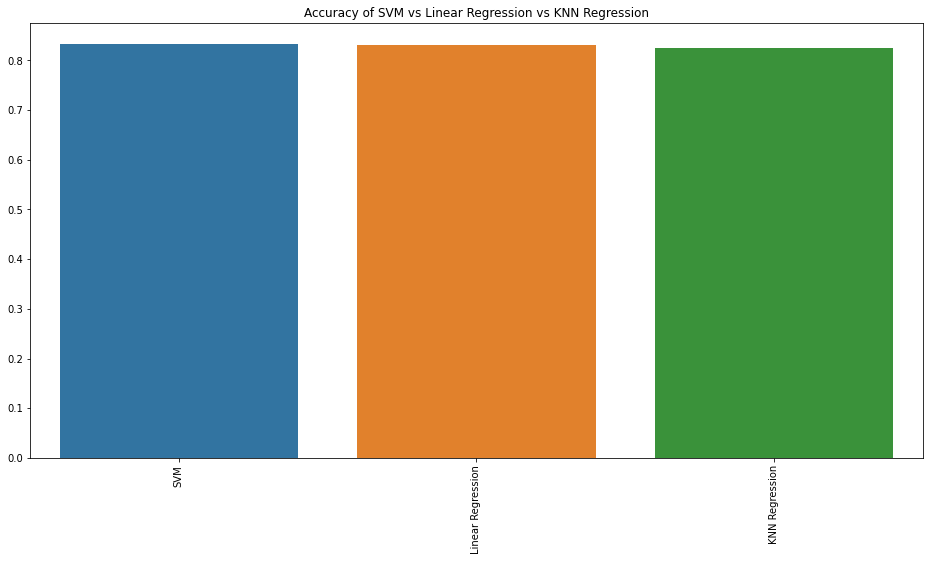

In [126]:
results = [regressor1.score(x1_test.values,y1_test.values), regressor2.score(x1_test.values,y1_test.values), reg.score(x1_test.values,y1_test.values)]
names = ["SVM","Linear Regression","KNN Regression"]
import seaborn as sns
plt.subplots(figsize=(16,8))

sns.barplot(names,results)
plt.xticks(rotation=90)
plt.title('Accuracy of SVM vs Linear Regression vs KNN Regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


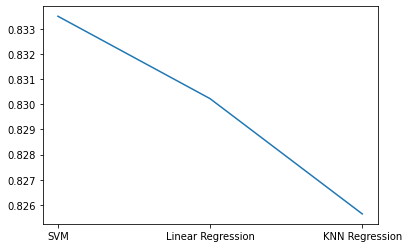

In [127]:
sns.lineplot(names,results)

**Support Vector Regessor for Model 2**

In [100]:
from sklearn.svm import SVR # Load libraries
regressor3=SVR(kernel='linear') # Creating an object
regressor3.fit(x2_train.values,y2_train.values)

SVR(kernel='linear')

In [101]:
y_pred_1=regressor3.predict(x2_test.values)

In [102]:
print(y_pred_1)

[3.22979758 2.46229604 3.17133382 3.23725653 3.21499245 2.45574866
 2.6597089  3.68793283 2.72161615 1.56624456 3.20029217 2.80619328
 1.80084862 3.49608241 3.87491506 3.14085693 3.76176272 3.46585465
 3.37053419 3.62261497 2.60633513 2.75221724 3.12186218 3.76437457
 3.48713087 3.35979678 3.40832798 3.44990906 2.68403053 3.59051854
 1.93670233 3.33351881 3.0245118  2.61899042 1.84011946 2.6860238
 3.76874075 2.71574996 2.53992061 3.43600923 2.92008356 3.23906307
 3.64327102 3.14390758 3.7543759  2.96481289 2.6476603  1.95383127
 2.48825995 3.15436133 2.28835355 2.69233221 3.73664865 2.10428856
 2.66693235 2.96463538 2.66759715 2.66037336 2.70548038 2.86119033
 3.33580726 2.66888848 2.59854988 2.59517198 3.10199597 2.48619659
 3.4816903  2.94234095 3.43388758 2.5022885  3.59050496 2.66438676
 2.57564295 2.40355059 1.87752716 3.70561821 2.16061771 2.31855519
 3.51743363 2.31484454 1.90897966 3.88352482 3.00084531 3.00163452
 3.257036   3.3435004  2.31733526 3.54322063 2.55568333 3.21452

In [103]:
mae = metrics.mean_absolute_error(y2_test.values,y_pred_1)
mse = metrics.mean_squared_error(y2_test.values,y_pred_1)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y2_test.values,y_pred_1)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.12039539352584827
MSE: 0.0235090563011465
RMSE: 0.1533266327196502
R-Squared: 0.9325874788710592


**Linear Regression for Model 2**

In [104]:
from sklearn.linear_model import LinearRegression
regressor4=LinearRegression() 
regressor4.fit(x2_train.values,y2_train.values)

LinearRegression()

In [105]:
y_pred_2=regressor4.predict(x2_test.values)

In [106]:
mae = metrics.mean_absolute_error(y2_test.values,y_pred_2)
mse = metrics.mean_squared_error(y2_test.values,y_pred_2)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y2_test.values,y_pred_2)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.13184518958758404
MSE: 0.027717178046022518
RMSE: 0.16648476821025554
R-Squared: 0.9205206356764315


**KNN Regressor for Model 2**

In [107]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn
x, y = mglearn.datasets.make_wave(n_samples=1400)
# split the wave dataset into a training and a test set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,
random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg1 = KNeighborsRegressor(n_neighbors=15)
# fit the model using the training data and training targets
reg1.fit(x2_train.values, y2_train.values)
b=reg1.predict(x2_test.values)
print("Test set predictions:\n{}".format(b))

Test set predictions:
[3.31933333 2.51406667 3.30573333 3.25126667 3.3676     2.4924
 2.73813333 3.72933333 2.89093333 1.86273333 3.26373333 2.81593333
 2.06833333 3.72013333 3.8732     3.33306667 3.87913333 3.50353333
 3.36373333 3.62693333 2.73433333 2.82306667 3.0908     3.81653333
 3.74606667 3.38793333 3.38426667 3.42813333 2.7266     3.58446667
 1.9984     3.3684     3.2854     2.79913333 2.21       2.7444
 3.85973333 2.73093333 2.70126667 3.69113333 3.13586667 3.40013333
 3.69693333 3.37086667 3.68046667 3.0048     2.818      1.99953333
 2.57426667 3.2434     2.3336     2.78766667 3.7714     2.112
 2.7632     2.85666667 3.0108     2.69353333 2.83973333 2.90553333
 3.3914     2.74013333 2.43626667 2.73606667 3.2476     2.46733333
 3.61686667 3.0104     3.60053333 2.58626667 3.6586     2.6774
 2.59406667 2.2712     2.03853333 3.8416     2.20933333 2.35426667
 3.5668     2.3222     2.08866667 3.88726667 3.14046667 3.09426667
 3.34313333 3.43306667 2.58973333 3.71693333 2.65453333 3

In [108]:
mae = metrics.mean_absolute_error(y2_test.values, b)
mse = metrics.mean_squared_error(y2_test.values, b)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y2_test.values, b)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results:
MAE: 0.1346820512820512
MSE: 0.030766464180264165
RMSE: 0.17540371769225466
R-Squared: 0.9117767684909704


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


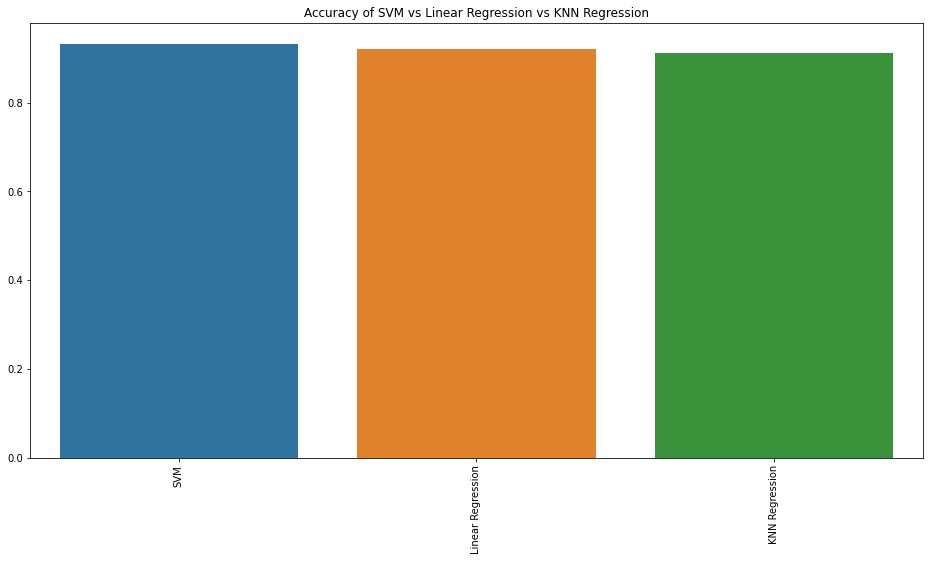

In [124]:
results = [regressor3.score(x2_test.values,y2_test.values), regressor4.score(x2_test.values,y2_test.values), reg1.score(x2_test.values,y2_test.values)]
names = ["SVM","Linear Regression","KNN Regression"]
import seaborn as sns
plt.subplots(figsize=(16,8))

sns.barplot(names,results)
plt.xticks(rotation=90)
plt.title('Accuracy of SVM vs Linear Regression vs KNN Regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


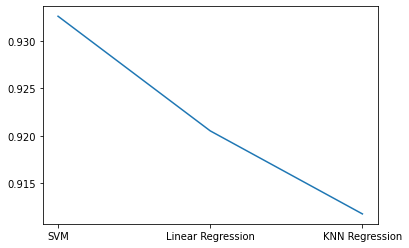

In [125]:
sns.lineplot(names,results)

**Support Vector Regressor for Model 3**

In [110]:
from sklearn.svm import SVR
regressor5=SVR(kernel='linear')
regressor5.fit(x3_train.values,y3_train.values)

SVR(kernel='linear')

In [111]:
y_pred_1=regressor5.predict(x3_test.values)

In [112]:
print(y_pred_1)

[3.1519019  2.41559725 3.0938834  3.09341764 3.35545381 2.37592371
 2.59323184 3.75587658 2.78813569 1.70504069 3.09157946 2.89146335
 1.95781089 3.63736823 3.96436331 3.26182239 3.8266885  3.37258012
 3.40229141 3.61907922 2.42276404 2.73843751 3.22343592 3.86140493
 3.4609163  3.11224134 3.36308464 3.29515207 2.80247383 3.5564246
 1.87843475 3.40196218 2.95711884 2.39220049 1.91106354 2.86051944
 3.79722028 2.91684388 2.5183575  3.56219169 2.91485788 3.2441481
 3.6474147  3.25346919 3.71271431 2.75417033 2.78444518 2.00311158
 2.58667137 3.26306585 2.21934228 2.66840263 3.79437995 2.31467244
 2.73602756 2.96977457 2.72505465 2.78240299 2.64412056 2.96226839
 3.32462575 2.77844032 2.12793104 2.68290075 3.08462777 2.44012217
 3.52838828 2.83076753 3.57182817 2.54491942 3.70049442 2.72671048
 2.72076958 2.20024438 1.74516411 3.71770833 2.11572457 2.02615784
 3.54955098 2.15796292 1.81072456 3.95336696 3.02017018 3.14039767
 3.28668436 3.28194339 2.47070874 3.61628849 2.3968425  3.285112

In [113]:
mae = metrics.mean_absolute_error(y3_test.values,y_pred_1)
mse = metrics.mean_squared_error(y3_test.values,y_pred_1)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y3_test.values,y_pred_1)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results:
MAE: 0.05574512833611266
MSE: 0.004958299158269027
RMSE: 0.07041519124641377
R-Squared: 0.9857820134296875


**Linear Regression For Model 3**

In [114]:
from sklearn.linear_model import LinearRegression
regressor6=LinearRegression()
regressor6.fit(x3_train.values,y3_train.values)

LinearRegression()

In [115]:
y_pred_2=regressor6.predict(x3_test.values)

In [116]:
mae = metrics.mean_absolute_error(y3_test.values,y_pred_2)
mse = metrics.mean_squared_error(y3_test.values,y_pred_2)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y3_test.values,y_pred_2)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.07432940214236057
MSE: 0.008388316701616756
RMSE: 0.091587754102919
R-Squared: 0.9759463940346934


KNN Regressor for Model 3

In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn
x, y = mglearn.datasets.make_wave(n_samples=1400)
# split the wave dataset into a training and a test set
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3,
random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg2 = KNeighborsRegressor(n_neighbors=15)
# fit the model using the training data and training targets
reg2.fit(x3_train.values, y3_train.values)
c=reg2.predict(x3_test.values)
print("Test set predictions:\n{}".format(c))

Test set predictions:
[3.2688     2.48866667 3.332      3.19093333 3.44073333 2.48046667
 2.74946667 3.8234     2.85493333 1.88366667 3.11793333 2.88873333
 2.08426667 3.81673333 3.9036     3.42133333 3.84306667 3.4224
 3.39073333 3.7004     2.56146667 2.8126     3.16253333 3.87853333
 3.67433333 3.23773333 3.41513333 3.34626667 2.77866667 3.67553333
 1.93286667 3.43006667 3.1774     2.69       2.1038     2.83466667
 3.86853333 2.90406667 2.6774     3.70393333 3.0394     3.37393333
 3.75613333 3.3732     3.70286667 2.8876     2.8558     2.13086667
 2.5688     3.2828     2.26593333 2.79513333 3.8402     2.22173333
 2.86326667 2.8912     2.82133333 2.799      2.76466667 3.00773333
 3.43073333 2.8118     2.09893333 2.77013333 3.21393333 2.46626667
 3.59466667 2.92506667 3.65026667 2.6136     3.79466667 2.669
 2.80046667 2.354      2.00986667 3.8132     2.22386667 2.06666667
 3.6158     2.09486667 1.98146667 3.89086667 3.09553333 3.16713333
 3.34893333 3.49313333 2.4938     3.69913333 2.58

In [118]:
mae = metrics.mean_absolute_error(y3_test.values, c)
mse = metrics.mean_squared_error(y3_test.values, c)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y3_test.values, c)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results:
MAE: 0.0920596736596736
MSE: 0.013222434623154613
RMSE: 0.11498884564667397
R-Squared: 0.9620844987569331


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


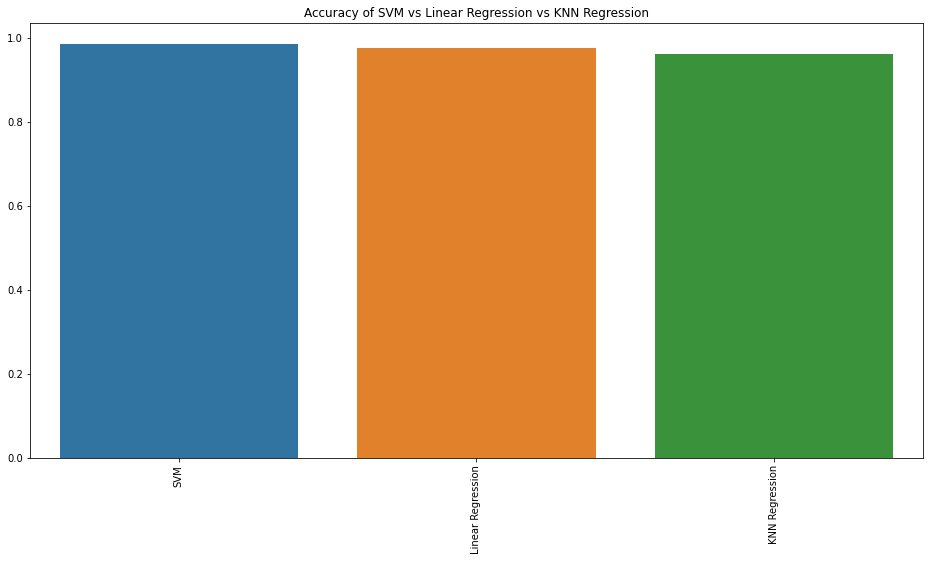

In [123]:
results = [regressor5.score(x3_test.values,y3_test.values), regressor6.score(x3_test.values,y3_test.values), reg2.score(x3_test.values,y3_test.values)]
names = ["SVM","Linear Regression","KNN Regression"]
import seaborn as sns
plt.subplots(figsize=(16,8))

sns.barplot(names,results)

plt.xticks(rotation=90)
plt.title('Accuracy of SVM vs Linear Regression vs KNN Regression')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


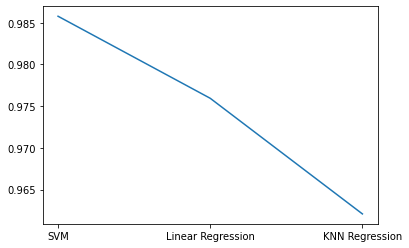

In [122]:
sns.lineplot(names,results)

**Interface**

In [ ]:
print('WELCOME TO CGPA PREDICTOR')
print('\nPress 1 for prediction on first year gpa.')
print('\nPress 2 for prediction on first two years gpa.')
print('\nPress 3 for prediction on first three years gpa.')
a=int(input('\nChoose any one from the options given above:'))
if a == 1:
   print('\nYou can enter any value from 4.0,3.7,3.3,3.0,2.7,2.3,2.0,1.7,1.3,1.0,0.0 below:')
   b=float(input('\nEnter the GPA of PH-121:'))
   c=float(input('Enter the GPA of HS-101:'))
   d=float(input('Enter the GPA of CY-105:'))
   e=float(input('Enter the GPA of HS-105/12:'))
   f=float(input('Enter the GPA of MT-111:'))
   g=float(input('Enter the GPA of CS-105:'))
   h=float(input('Enter the GPA of CS-106:'))
   i=float(input('Enter the GPA of EL-102:'))
   j=float(input('Enter the GPA of EE-119:'))
   k=float(input('Enter the GPA of ME-107:'))
   l=float(input('Enter the GPA of CS-107:'))
   new_input=[[b,c,d,e,f,g,h,i,j,k,l]]
   out1=regressor1.predict(new_input)
   print('The Predicted CGPA using SVR is',(out1))
   out2=regressor2.predict(new_input)
   print('The Predicted CGPA using Linear Regression is',(out2))
   out3=reg.predict(new_input)
   print('The Predicted CGPA using kNN Regressor is',(out3))
if a == 2:
   print('\nYou can enter any value from 4.0,3.7,3.3,3.0,2.7,2.3,2.0,1.7,1.3,1.0,0.0 below:')
   b=float(input('\nEnter the GPA of PH-121:'))
   c=float(input('Enter the GPA of HS-101:'))
   d=float(input('Enter the GPA of CY-105:'))
   e=float(input('Enter the GPA of HS-105/12:'))
   f=float(input('Enter the GPA of MT-111:'))
   g=float(input('Enter the GPA of CS-105:'))
   h=float(input('Enter the GPA of CS-106:'))
   i=float(input('Enter the GPA of EL-102:'))
   j=float(input('Enter the GPA of EE-119:'))
   k=float(input('Enter the GPA of ME-107:'))
   l=float(input('Enter the GPA of CS-107:'))
   m=float(input('Enter the GPA of HS-205/20:'))
   n=float(input('Enter the GPA of MT-222:'))
   o=float(input('Enter the GPA of EE-222:'))
   p=float(input('Enter the GPA of MT-224:'))
   q=float(input('Enter the GPA of CS-210:'))
   r=float(input('Enter the GPA of CS-211:'))
   s=float(input('Enter the GPA of CS-203:'))
   t=float(input('Enter the GPA of CS-214:'))
   u=float(input('Enter the GPA of EE-217:'))
   v=float(input('Enter the GPA of CS-212:'))
   w=float(input('Enter the GPA of CS-215:'))
   new_input=[[b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,g,r,s,t,u,v,w]]
   out4=regressor3.predict(new_input)
   print('The Predicted CGPA using SVR is',(out4))
   out5=regressor4.predict(new_input)
   print('The Predicted CGPA using Linear Regression is',(out5))
   out6=reg1.predict(new_input)
   print('The Predicted CGPA using kNN Regressor is',(out6))
if a == 3:
   print('\nYou can enter any value from 4.0,3.7,3.3,3.0,2.7,2.3,2.0,1.7,1.3,1.0,0.0 below:')
   b=float(input('\nEnter the GPA of PH-121:'))
   c=float(input('Enter the GPA of HS-101:'))
   d=float(input('Enter the GPA of CY-105:'))
   e=float(input('Enter the GPA of HS-105/12:'))
   f=float(input('Enter the GPA of MT-111:'))
   g=float(input('Enter the GPA of CS-105:'))
   h=float(input('Enter the GPA of CS-106:'))
   i=float(input('Enter the GPA of EL-102:'))
   j=float(input('Enter the GPA of EE-119:'))
   k=float(input('Enter the GPA of ME-107:'))
   l=float(input('Enter the GPA of CS-107:'))
   m=float(input('Enter the GPA of HS-205/20:'))
   n=float(input('Enter the GPA of MT-222:'))
   o=float(input('Enter the GPA of EE-222:'))
   p=float(input('Enter the GPA of MT-224:'))
   q=float(input('Enter the GPA of CS-210:'))
   r=float(input('Enter the GPA of CS-211:'))
   s=float(input('Enter the GPA of CS-203:'))
   t=float(input('Enter the GPA of CS-214:'))
   u=float(input('Enter the GPA of EE-217:'))
   v=float(input('Enter the GPA of CS-212:'))
   w=float(input('Enter the GPA of CS-215:'))
   x=float(input('Enter the GPA of MT-331:'))
   y=float(input('Enter the GPA of EF-303:'))
   z=float(input('Enter the GPA of HS-304:'))
   aa=float(input('Enter the GPA of CS-301:'))
   ab=float(input('Enter the GPA of CS-302:'))
   ac=float(input('Enter the GPA of TC-383:'))
   ad=float(input('Enter the GPA of EL-332:'))
   ae=float(input('Enter the GPA of CS-318:'))
   af=float(input('Enter the GPA of CS-306:'))
   ag=float(input('Enter the GPA of CS-312:'))
   ah=float(input('Enter the GPA of CS-317:'))
   new_input=[[b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,g,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad,ae,af,ag,ah]]
   out7=regressor5.predict(new_input)
   print('The Predicted CGPA using SVR is',(out7))
   out8=regressor6.predict(new_input)
   print('The Predicted CGPA using Linear Regression is',(out8))
   out9=reg2.predict(new_input)
   print('The Predicted CGPA using kNN Regressor is',(out9))


WELCOME TO CGPA PREDICTOR

Press 1 for prediction on first year gpa.

Press 2 for prediction on first two years gpa.

Press 3 for prediction on first three years gpa.
